## Analysis of Data Analyst Job postings
### Overview
In this project we will be doing an Exploratory Data Analysis of the Data Analyst Job postings taken from Glassdoor to better
understand the job market and thus help with the job search process.

In [2]:
# import the required libraries for computation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

### Data

In [3]:
# load the dataset
data = pd.read_csv('DataAnalyst.csv')

In [4]:
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [5]:
# number of observations and features
data.shape

(2253, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [7]:
def feature_categories(x, df):
    '''
    function to show categories of all the columns of the dataset
    INPUT: 
          X - list of column names of the data
          df - dataset
    OUTPUT:
           categories of all the features of the data
    '''
    a = []
    for i in x:
        a.append(df[i].value_counts())
    return a

In [8]:
#cat = [data[i].value_counts() for i in data_.columns]

In [9]:
data_ = data.drop('Job Description', axis=1)
feature_categories(data_.columns, data_)

[2047    1
 1290    1
 1302    1
 1300    1
 1298    1
        ..
 557     1
 559     1
 561     1
 563     1
 0       1
 Name: Unnamed: 0, Length: 2253, dtype: int64,
 Data Analyst                                                          405
 Senior Data Analyst                                                    90
 Junior Data Analyst                                                    30
 Business Data Analyst                                                  28
 Sr. Data Analyst                                                       21
                                                                      ... 
 9-1-1 Data Analyst                                                      1
 Senior Manager, Data Analyst                                            1
 NIWC Service Desk Analyst Component Enterprise Data Center (CEDC).      1
 Bilingual (Chinese) Data Analyst                                        1
 Data Analyst/Architect                                                  1
 Name: 

### Data Cleaning

In [10]:
# dropping the unnamed column as it serves the same purpose as the index column
data.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
# The missing values are represented as -1, replacing the -1 values with nan
data.replace([-1, -1.0, '-1'], np.nan, inplace=True)

In [12]:
# replacing Unknown to nan values
data.replace(['Unknown', 'Unknown / Non-Applicable'], np.nan, inplace=True)

In [13]:
# This shows the number of non-null values in each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2252 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             1981 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2081 non-null   object 
 7   Size               2048 non-null   object 
 8   Founded            1593 non-null   float64
 9   Type of ownership  2074 non-null   object 
 10  Industry           1900 non-null   object 
 11  Sector             1900 non-null   object 
 12  Revenue            1475 non-null   object 
 13  Competitors        521 non-null    object 
 14  Easy Apply         80 non-null     object 
dtypes: float64(2), object(13)
memory usage: 264.1+ KB


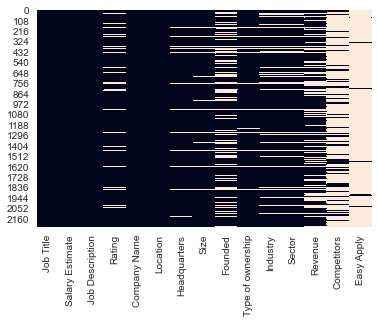

In [14]:
# heatmap to show the presence of missing values
sns.heatmap(data.isnull(), cbar=False)

### Missing Values Table
Shows the count and percentage of missing values in each column

In [15]:
missing_values_cnt = data.isnull().sum()
percent_nan = round(100 * data.isnull().sum()/ len(data), 2)
data_types = data.dtypes

In [16]:
missing_values_table = pd.concat([missing_values_cnt, percent_nan, data_types], axis=1)
missing_values_table = missing_values_table.rename(columns = {0: 'Count', 1: 'Percentage', 2: 'Datatype'})
missing_values_table

,Count,Percentage,Datatype
Job Title,0,0.00,object
Salary Estimate,1,0.04,object
Job Description,0,0.00,object
Rating,272,12.07,float64
Company Name,1,0.04,object
Location,0,0.00,object
Headquarters,172,7.63,object
Size,205,9.10,object
Founded,660,29.29,float64
Type of ownership,179,7.94,object


### Missing values in "Salary Estimate"

In [17]:
data.loc[data['Salary Estimate'].isnull() == True]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2149,Configuration/Data Management Analyst III,NaN,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001.0,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),NaN,NaN


Deleting the row with a missing value in the 'Salary Estimate' column will make us lose a lot of information 
from the other features, thus we will skip dropping this row.

### Missing Values in "Company Name"

In [18]:
data.loc[data['Company Name'].isnull() == True]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
1860,Data Analyst,$53K-$99K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",NaN,NaN,"Mooresville, NC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# dropping the above row as almost all the feature values are missing
data.drop(data.index[1860], inplace=True)

### Missing values in "Rating"

In [20]:
data['Rating'].describe()

count    1981.000000
mean        3.731903
std         0.670332
min         1.000000
25%         3.300000
50%         3.700000
75%         4.100000
max         5.000000
Name: Rating, dtype: float64

In [21]:
# filling the null values of the rating coulmn with the mean
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

### Missing values in "Headquarters"

In [22]:
# filling the null values of the headquarters coulmn with the mode
data['Headquarters'].fillna(data['Headquarters'].mode()[0], inplace=True)

In [23]:
data['Headquarters'].describe()

count             2252
unique             482
top       New York, NY
freq               377
Name: Headquarters, dtype: object

In [ ]:
### Dropping the columns not important to us and with with missing values more than 30%

In [22]:
# Dropping the columns with missing values more than 30%
#data.drop(['Competitors', 'Job Description','Company Name'], axis=1, inplace=True)

## Feature Extraction
### Creating a new column "State" from the Location feature

In [24]:
data['Location'].value_counts()

New York, NY          310
Chicago, IL           130
San Francisco, CA     119
Austin, TX             81
Los Angeles, CA        80
                     ... 
Carrollton, TX          1
Jeffersonville, IN      1
Riverton, UT            1
Des Plaines, IL         1
Paoli, PA               1
Name: Location, Length: 253, dtype: int64

In [25]:
# Creating a new column, 'state' from the location feature
city, data['state'] = data['Location'].str.split(',', 1).str

<ipython-input-25-abe2339b2583>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  city, data['state'] = data['Location'].str.split(',', 1).str


In [26]:
data['state'].value_counts()

 CA              626
 TX              394
 NY              345
 IL              164
 PA              114
 AZ               97
 NC               89
 CO               88
 NJ               86
 WA               54
 VA               48
 OH               35
 UT               33
 FL               27
 IN               23
 DE               11
 Arapahoe, CO      8
 GA                4
 SC                3
 KS                3
Name: state, dtype: int64

In [27]:
# replacing 'Arapahoe, CO' with 'CO'
state = []
for i in data['state']:
    if i == ' Arapahoe, CO':
        new_i = i.replace(' Arapahoe, CO', ' CO')
    else:
        new_i = i
    state.append(new_i)
# 
## adding the state column to the dataset
data['state'] = state

In [28]:
data['state'].value_counts()

 CA    626
 TX    394
 NY    345
 IL    164
 PA    114
 AZ     97
 CO     96
 NC     89
 NJ     86
 WA     54
 VA     48
 OH     35
 UT     33
 FL     27
 IN     23
 DE     11
 GA      4
 SC      3
 KS      3
Name: state, dtype: int64

### Extracting the job title and the department from "Job Title" feature

In [29]:
data['job_title'], data['dept'] = data['Job Title'].str.split(',', 1).str

<ipython-input-29-36dc0a05d8e2>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['job_title'], data['dept'] = data['Job Title'].str.split(',', 1).str


In [30]:
# missing values in the department column
data['dept'].isnull().sum()

2022

In [31]:
# removing the rating from the "Company Name" feature
data['company_name'], rat = data['Company Name'].str.split('\n', 1).str

<ipython-input-31-87f1613ec9c6>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['company_name'], rat = data['Company Name'].str.split('\n', 1).str


In [27]:
#data.drop(['Job Title','Salary Estimate','Company Name'], axis=1, inplace=True)

### Salary Estimate
Etracting the features "min salary", "max salary", and "average salary" from the "Salary Estimate"

In [32]:
data['Salary Estimate'].value_counts().index.tolist()

['$41K-$78K (Glassdoor est.)',
 '$42K-$76K (Glassdoor est.)',
 '$50K-$86K (Glassdoor est.)',
 '$35K-$67K (Glassdoor est.)',
 '$43K-$76K (Glassdoor est.)',
 '$60K-$124K (Glassdoor est.)',
 '$58K-$93K (Glassdoor est.)',
 '$97K-$129K (Glassdoor est.)',
 '$51K-$87K (Glassdoor est.)',
 '$60K-$66K (Glassdoor est.)',
 '$30K-$53K (Glassdoor est.)',
 '$60K-$110K (Glassdoor est.)',
 '$37K-$68K (Glassdoor est.)',
 '$37K-$66K (Glassdoor est.)',
 '$59K-$85K (Glassdoor est.)',
 '$69K-$127K (Glassdoor est.)',
 '$46K-$87K (Glassdoor est.)',
 '$35K-$42K (Glassdoor est.)',
 '$64K-$113K (Glassdoor est.)',
 '$42K-$66K (Glassdoor est.)',
 '$98K-$114K (Glassdoor est.)',
 '$46K-$86K (Glassdoor est.)',
 '$43K-$69K (Glassdoor est.)',
 '$27K-$52K (Glassdoor est.)',
 '$51K-$88K (Glassdoor est.)',
 '$37K-$70K (Glassdoor est.)',
 '$55K-$103K (Glassdoor est.)',
 '$67K-$92K (Glassdoor est.)',
 '$113K-$132K (Glassdoor est.)',
 '$24K-$48K (Glassdoor est.)',
 '$43K-$94K (Glassdoor est.)',
 '$26K-$47K (Glassdoor est.)',

In [33]:
data['salary_estimate'], portal = data['Salary Estimate'].str.split('(', 1).str

<ipython-input-33-2798da560748>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['salary_estimate'], portal = data['Salary Estimate'].str.split('(', 1).str


In [34]:
# minimun salary and maximum salary
data['min_salary'], data['max_salary'] = data['salary_estimate'].str.split('-', 1).str

<ipython-input-34-ea8b35d44b69>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['min_salary'], data['max_salary'] = data['salary_estimate'].str.split('-', 1).str


In [35]:
print(len(data['min_salary']), len(data['max_salary']))

2252 2252


In [36]:
data['min_salary'].unique()

array(['$37K', '$46K', '$51K', '$59K', '$43K', '$60K', '$41K', '$45K',
       '$73K', '$84K', '$27K', '$42K', '$77K', '$98K', '$48K', '$26K',
       '$31K', '$47K', '$49K', '$30K', '$55K', '$57K', '$35K', '$65K',
       '$113K', '$67K', '$97K', '$68K', '$29K', '$74K', '$53K', '$38K',
       '$64K', '$50K', '$76K', '$34K', '$24K', '$44K', '$110K', '$89K',
       '$69K', '$58K', '$63K', '$40K', '$28K', '$54K', '$99K', '$93K',
       '$82K', nan, '$32K', '$36K', '$78K'], dtype=object)

In [37]:
#cleaning the min_salary column for computation
salary = []
for i in data['min_salary']:
    msal = str(i).replace("$", "")
    salary.append(msal)
    
min_salary = []
for i in salary:
    msal = str(i).replace("K", "")
    min_salary.append(msal)
    
#changing the datatype to float
data['min_salary'] = min_salary
data['min_salary'] = data['min_salary'].astype(float)

In [38]:
#cleaning the max_salary column for computation
salary = []
for i in data['max_salary']:
    msal = str(i).replace("$", "")
    salary.append(msal)
    
max_salary = []
for i in salary:
    msal = str(i).replace("K", "")
    max_salary.append(msal)
    
#changing the datatype to float
data['max_salary'] = max_salary
data['max_salary'] = data['max_salary'].astype(float)

In [39]:
# Average Salary
avg = (data['min_salary']+data['max_salary'])/2
data['avg_sal'] = avg

In [40]:
# dropping the columns not important to us
data.drop(['Job Title','Salary Estimate','Job Description','Company Name','Competitors','dept','company_name','job_title'], axis=1, inplace=True)

In [41]:
data.head()

,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,state,salary_estimate,min_salary,max_salary,avg_sal
0,3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True,NY,$37K-$66K,37.0,66.0,51.5
1,3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NY,$37K-$66K,37.0,66.0,51.5
2,3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,NaN,NaN,NY,$37K-$66K,37.0,66.0,51.5
3,4.1,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NY,$37K-$66K,37.0,66.0,51.5
4,3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True,NY,$37K-$66K,37.0,66.0,51.5


### Missing values in "Easy Apply"
we'll fill the nan values as 'False' indicating that the company hiring currently

In [42]:
data['Easy Apply']=data['Easy Apply'].fillna('False')

### Using K-nearest neighbor algorithm to fill the missing values

As kNN works only on numeric variables, we'll convert our categorical variables by creating dummy variables

In [45]:
df = data.drop(['Job Description','Location','Headquarters','job_title','company_name'], axis=1)

In [46]:
df.head()

,Rating,Size,Founded,Type of ownership,Industry,Sector,Revenue,state,min_salary,max_salary,avg_sal
0,3.2,201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NY,37.0,66.0,51.5
1,3.8,10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NY,37.0,66.0,51.5
2,3.4,1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,NY,37.0,66.0,51.5
3,4.1,201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NY,37.0,66.0,51.5
4,3.9,501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),NY,37.0,66.0,51.5


In [47]:
data1 = pd.get_dummies(df, columns=['Size', 'Revenue', 'Type of ownership', 'Industry', 'Sector','state'], dummy_na=True)

#data1.columns.tolist()

In [48]:
data1.head()

,Rating,Founded,min_salary,max_salary,avg_sal,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,...,state_ NJ,state_ NY,state_ OH,state_ PA,state_ SC,state_ TX,state_ UT,state_ VA,state_ WA,state_nan
0,3.2,1961.0,37.0,66.0,51.5,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,3.8,1893.0,37.0,66.0,51.5,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3.4,2003.0,37.0,66.0,51.5,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4.1,2002.0,37.0,66.0,51.5,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,3.9,2009.0,37.0,66.0,51.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [49]:
# function to replace the dummy zeros to actual nan values
def dummy_nan(col, col_name):
    dcol = col.value_counts().index.tolist()
    d_list = []
    for i in dcol:
        d_list.append(col_name+i)
        
    data1.loc[data1[col_name+'nan'] == 1, d_list] = np.nan
    del data1[col_name+'nan']
    
dummy_nan(data['Size'], 'Size_')
dummy_nan(data['Revenue'], 'Revenue_')
dummy_nan(data['Type of ownership'], 'Type of ownership_')
dummy_nan(data['Industry'], 'Industry_')
dummy_nan(data['Sector'], 'Sector_')
dummy_nan(data['state'], 'state_')

In [52]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
data_knn = imputer.fit_transform(data1)

In [58]:
data_knn

array([[   3.2       , 1961.        ,   37.        , ...,    0.        ,
           0.        ,    0.        ],
       [   3.8       , 1893.        ,   37.        , ...,    0.        ,
           0.        ,    0.        ],
       [   3.4       , 2003.        ,   37.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   3.73190308, 1949.4       ,   78.        , ...,    0.        ,
           0.        ,    0.        ],
       [   3.1       , 1984.        ,   78.        , ...,    0.        ,
           0.        ,    0.        ],
       [   3.4       , 1864.        ,   78.        , ...,    0.        ,
           0.        ,    0.        ]])

In [66]:
data_knn.shape

(2252, 170)

In [60]:
# check for missing values in the dataset after KNN imputation
df1 = pd.DataFrame(data_knn)
df1.isnull().sum().sum()

### Exploratory Data Analysis

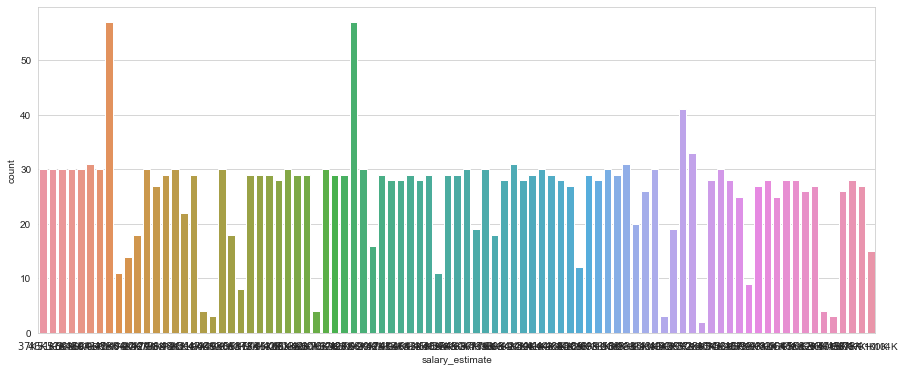

In [65]:
plt.figure(figsize=(15,6))
sns.countplot('salary_estimate', data = data)
plt.xticks(rotation=70)

In [76]:
# top 10 Data Analyst salary estimates
sal_est = data['salary_estimate'].value_counts().sort_values(ascending=False).head(10)
sal_est

$41K-$78K      57
$42K-$76K      57
$50K-$86K      41
$35K-$67K      33
$58K-$93K      31
$43K-$76K      31
$60K-$124K     31
$46K-$86K      30
$97K-$129K     30
$42K-$66K      30
Name: salary_estimate, dtype: int64

### Top 10 salaries offered for Data Analyst Jobs

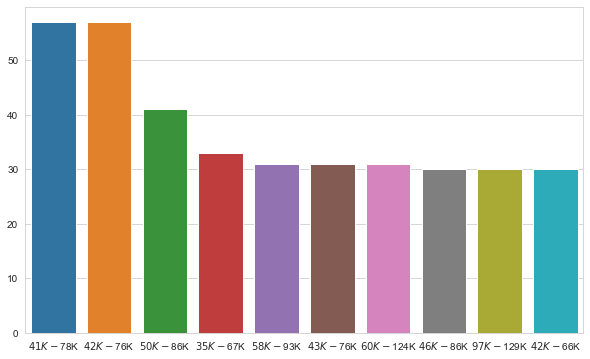

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(sal_est.index.tolist(), sal_est.tolist())

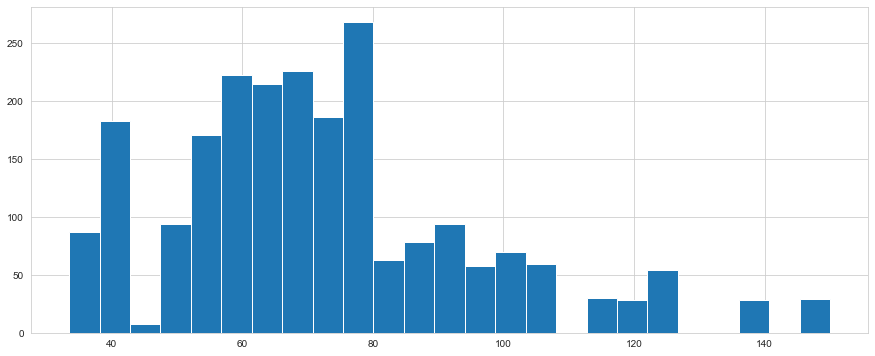

In [87]:
# distribution of average salary
plt.figure(figsize=(15,6))
data['avg_sal'].hist(bins = 25, xlabelsize = 10)

In [33]:
data['avg_sal'].min()

33.5

In [34]:
data['avg_sal'].max()

150.0

### Salary Distribution

Text(0.5, 0, 'Salary Distribution')

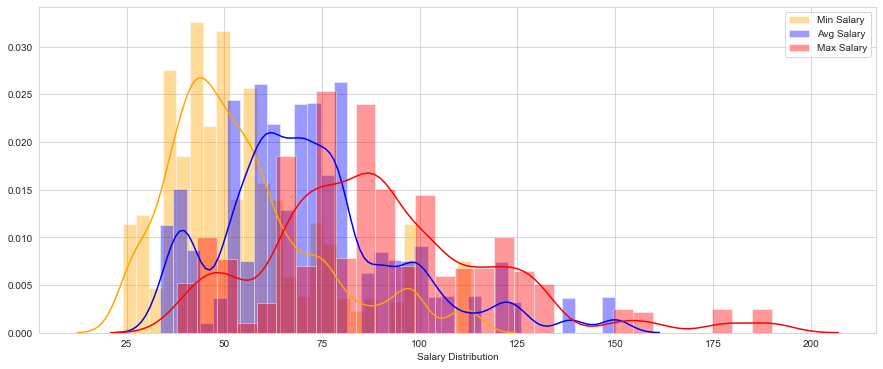

In [163]:
plt.figure(figsize=(15,6))
sns.distplot(data['min_salary'], color='orange',label='Min Salary')
sns.distplot(data['avg_sal'], color='blue',label='Avg Salary')
sns.distplot(data['max_salary'], color='red',label='Max Salary')

plt.legend()
plt.xlabel('Salary Distribution')

Text(0.5, 0, 'Salary Distribution')

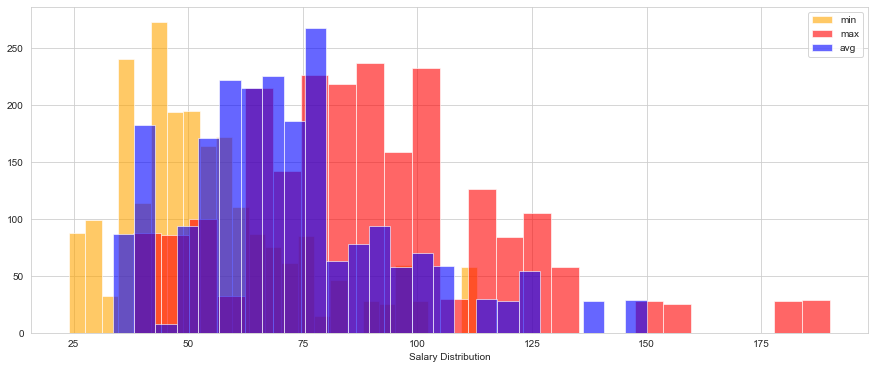

In [93]:
plt.figure(figsize=(15,6))
data['min_salary'].hist(bins = 25, color='orange',label='min', alpha = 0.6)
data['max_salary'].hist(bins = 25, color='red',label='max', alpha = 0.6)
data['avg_sal'].hist(bins = 25, color='blue',label='avg', alpha = 0.6)
plt.legend()
plt.xlabel('Salary Distribution')

from the above two graphs we can observe that the average salary of a large number of data analyst jobs lie between 40k to 80k

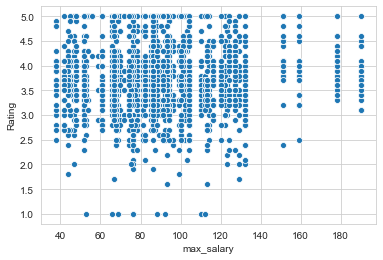

In [56]:
sns.scatterplot('max_salary', 'Rating', data=data)

we do not observe any correlation between salary and rating

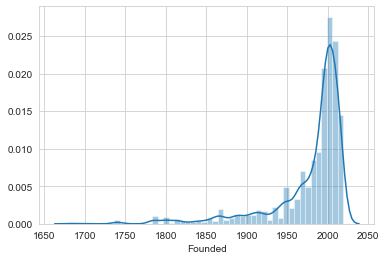

In [99]:
sns.distplot(data['Founded'])

Majority of the companies hirirng for data analysts were founded in the last two decades

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

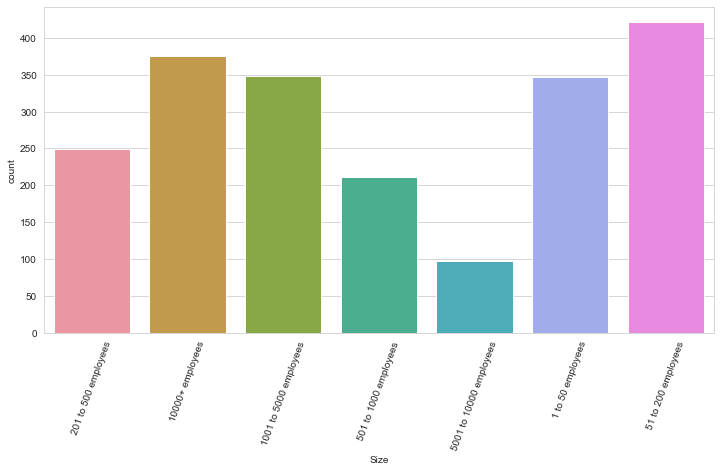

In [195]:
plt.figure(figsize=(12,6))
sns.countplot(data['Size'])
plt.xticks(rotation=70)

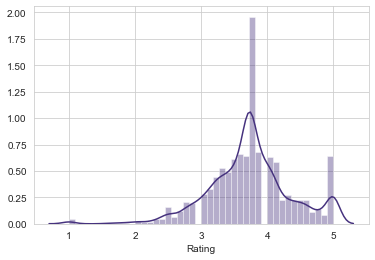

In [171]:
sns.distplot(data['Rating'])

In [112]:
data['Founded'].value_counts().head(5)

2008.0    80
2002.0    54
1996.0    54
2000.0    54
1999.0    53
Name: Founded, dtype: int64

In [122]:
data['Revenue'].value_counts()

$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

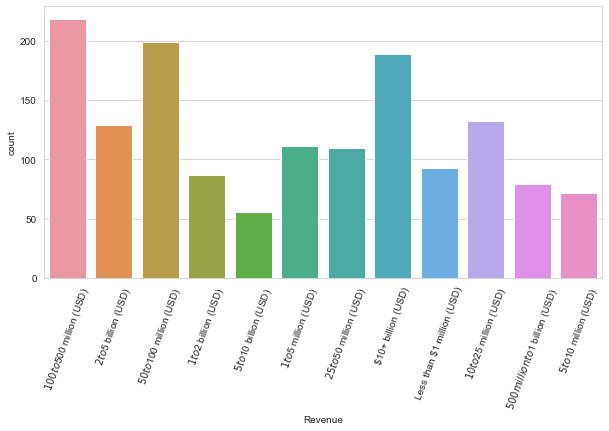

In [127]:
plt.figure(figsize=(10,5))
sns.countplot(data['Revenue'])
plt.xticks(rotation=70)

Text(0.5, 1.0, 'Jobs offered by Industry')

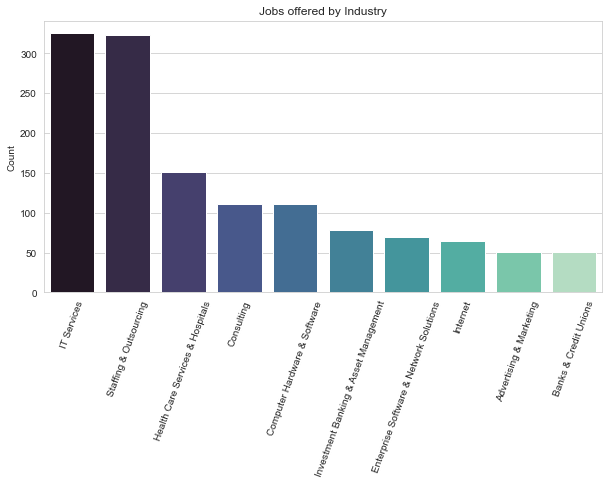

In [190]:
indus = data['Industry'].value_counts().sort_values(ascending=False).index.tolist()[:10]
indus_values = data['Industry'].value_counts().sort_values(ascending=False).tolist()[:10]

plt.figure(figsize=(10,5))
sns.barplot(indus, indus_values, palette="mako")
plt.xticks(rotation=70)
plt.ylabel("Count")
plt.title('Jobs offered by Industry')

Text(0.5, 1.0, 'Jobs Offered by Sector')

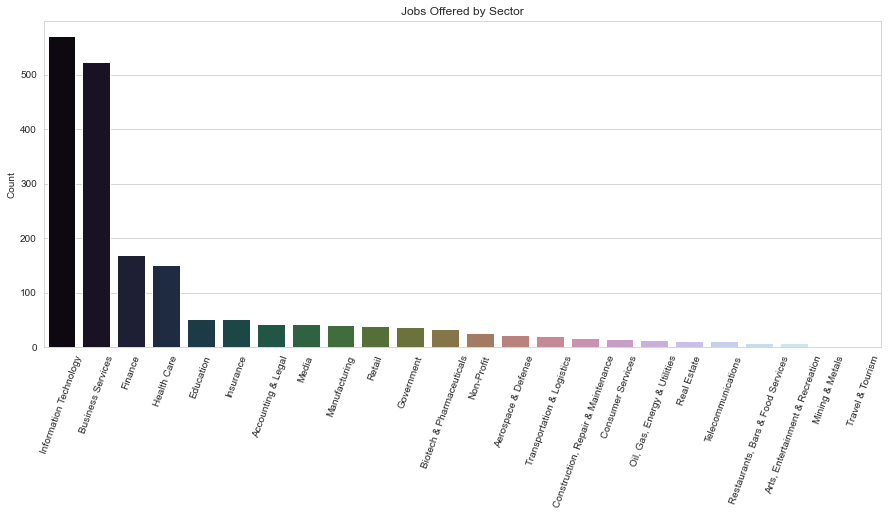

In [191]:
sec = data['Sector'].value_counts().sort_values(ascending=False).index.tolist()
sec_values = data['Sector'].value_counts().sort_values(ascending=False).tolist()

plt.figure(figsize=(15,6))
sns.barplot(sec, sec_values, palette='cubehelix')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.title('Jobs Offered by Sector')

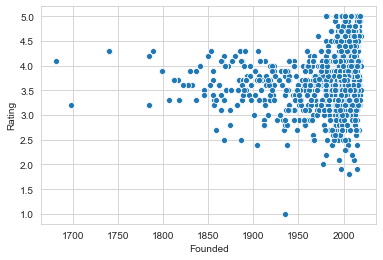

In [97]:
sns.scatterplot('Founded', 'Rating', data=data)

### Average Salary by State

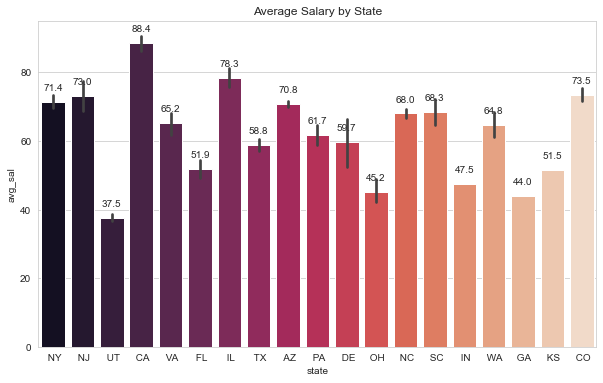

In [43]:
plt.figure(figsize=(10,6))
b_plot = sns.barplot('state', 'avg_sal', data = data, palette='rocket')
plt.title("Average Salary by State")
for p in b_plot.patches:
    b_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 14), 
                   textcoords = 'offset points')

Text(0.5, 1.0, 'Number of Job Postings')

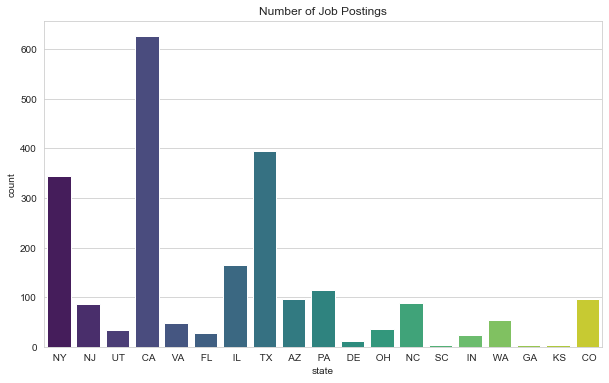

In [169]:
plt.figure(figsize=(10,6))
sns.countplot(data['state'], palette="viridis")
plt.title('Number of Job Postings')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

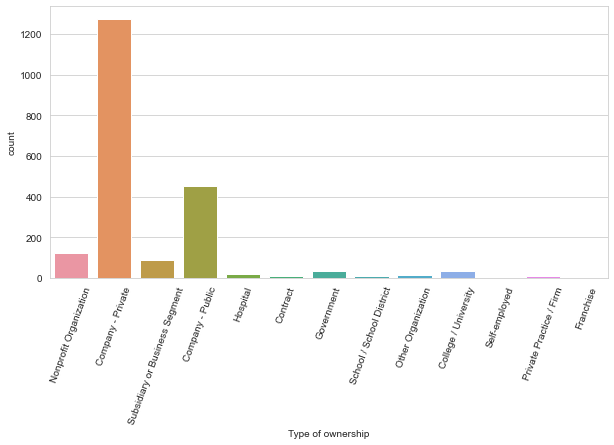

In [145]:
plt.figure(figsize=(10,5))
sns.countplot(x='Type of ownership', data=data)
plt.xticks(rotation=70)
#plt.tight_layout()